# Climbing image NEB example - Lammps

In [1]:
# headers

# general modules
import numpy as np
import matplotlib.pyplot as plt

# pyiron modules
from pyiron_atomistics import Project
import pyiron_contrib

In [2]:
# define project

pr = Project('neb_example')
pr.remove_jobs(recursive=True)

In [4]:
# inputs 

# structure specific
element = 'Al'
supercell = 3
vac_id_initial = 0
vac_id_final = 1
cubic = True

# job specific
potential = '2008--Mendelev-M-I--Al--LAMMPS--ipr1'

# NEB specific
n_images = 7
neb_steps = 200
gamma0 = 0.1
dynamic_gamma = True
climbing_image = True

In [5]:
# create base structure

box = pr.create.structure.bulk(name=element, cubic=cubic).repeat(supercell)

In [6]:
# template minimization job

template_job = pr.create.job.Lammps('template')
template_job.potential = potential

In [7]:
# vacancy @ atom id 0 minimization

vac_0_struct = box.copy()  # copy box
vac_0_struct.pop(vac_id_initial)  # create vacancy

vac_0 = template_job.copy_template(project=pr, new_job_name='vac_0')
vac_0.structure = vac_0_struct
vac_0.calc_minimize(pressure=0.)
vac_0.run()

# vacancy @ atom id 1 minimization

vac_1_struct = box.copy()  # copy box
vac_1_struct.pop(vac_id_final)  # create vacancy

vac_1 = template_job.copy_template(project=pr, new_job_name='vac_1')
vac_1.structure = vac_1_struct
vac_1.calc_minimize(pressure=0.)
vac_1.run()

The job vac_0 was saved and received the ID: 1008


/home/raynol025/pyiron/pyiron_atomistics/pyiron_atomistics/lammps/units.py:201: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity steps. Returning un-normalized quantity
  warnings.warn(message="Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity "
/home/raynol025/pyiron/pyiron_atomistics/pyiron_atomistics/lammps/units.py:201: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity indices. Returning un-normalized quantity
  warnings.warn(message="Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity "
/home/raynol025/pyiron/pyiron_atomistics/pyiron_atomistics/lammps/units.py:201: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity velocities. Returning un-normalized quantity
  warnings.warn(message="Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity "
/home/raynol025/pyiro

The job vac_1 was saved and received the ID: 1009


/home/raynol025/pyiron/pyiron_atomistics/pyiron_atomistics/lammps/units.py:201: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity indices. Returning un-normalized quantity
  warnings.warn(message="Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity "
/home/raynol025/pyiron/pyiron_atomistics/pyiron_atomistics/lammps/units.py:201: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity velocities. Returning un-normalized quantity
  warnings.warn(message="Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity "
/home/raynol025/pyiron/pyiron_atomistics/pyiron_atomistics/lammps/units.py:201: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity steps. Returning un-normalized quantity
  warnings.warn(message="Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity "


In [8]:
# create and run the NEB job

pr_neb = pr.create_group('neb')  # create a new folder

neb_ref = pr_neb.create.job.Lammps('ref_neb')
neb_ref.structure = vac_0.get_structure()
neb_ref.potential = potential
neb_ref.save()  # Don't forget this step!

neb_job = pr_neb.create.job.ProtoNEBSer('neb_job')
neb_job.input.ref_job_full_path = neb_ref.path
neb_job.input.structure_initial = vac_0.get_structure()
neb_job.input.structure_final = vac_1.get_structure()
neb_job.input.n_images = n_images
neb_job.input.n_steps = neb_steps
neb_job.input.gamma0 = gamma0
neb_job.input.use_climbing_image = climbing_image
neb_job.input.dynamic_gamma = dynamic_gamma

# set_output_whitelist sets how often an output of a particular vertex is stored in the archive.
# for example, here, the output 'energy_pot' of vertex 'calc_static' is saved every 20 steps in the archive.
neb_job.set_output_whitelist(**{'calc_static': {'energy_pot': 20}})

neb_job.run()

The job ref_neb was saved and received the ID: 1010
The job neb_job was saved and received the ID: 1011
The job initialize_jobs_0 was saved and received the ID: 1012
The job initialize_jobs_1 was saved and received the ID: 1013
The job initialize_jobs_2 was saved and received the ID: 1014
The job initialize_jobs_3 was saved and received the ID: 1015
The job initialize_jobs_4 was saved and received the ID: 1016
The job initialize_jobs_5 was saved and received the ID: 1017
The job initialize_jobs_6 was saved and received the ID: 1018


/home/raynol025/pyiron/pyiron_base/pyiron_base/generic/parameters.py:282: UserWarning: The input in GenericParameters changed, while the state of the job was already finished.
  warnings.warn(


Convergence reached in 83 steps. Stopping run.


In [9]:
# load the neb job

neb_job = pr.load('neb_job')

Migration barrier: 0.6512616630330399 eV


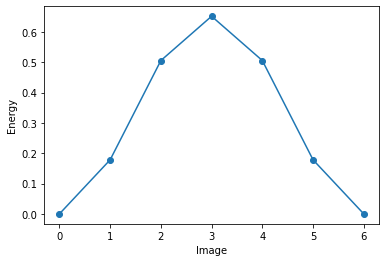

<AxesSubplot:xlabel='Image', ylabel='Energy'>

In [10]:
# get the migration barrier

print('Migration barrier: {} eV'.format(neb_job.get_barrier()))

# plot the band
neb_job.plot_elastic_band()